# Pylops - freq domain phase shift

### Author: M.Ravasi

In this notebook I will show how to use the `Shift` operator.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import pylops

from scipy.sparse import csr_matrix, vstack, rand
from scipy.linalg import lstsq, solve, pinv
from scipy.sparse.linalg import LinearOperator as spLinearOperator
from scipy.sparse.linalg import cg, lsqr

from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.utils.seismicevents        import *
from pylops.basicoperators             import *
from pylops.signalprocessing           import *
from pylops.waveeqprocessing.mdd       import *
from pylops.optimization.leastsquares  import *
from pylops.optimization.sparsity  import IRLS as IRLSpylops
from pylops.optimization.sparsity  import FISTA, SPGL1

In [15]:
nt = 127
dt = 0.004
t = np.arange(nt) * dt
ntwav = 41
nfft = 127

wav = ricker(t[:ntwav], f0=20)[0]
wav = np.pad(wav, [0, nt-len(wav)])
WAV = np.fft.rfft(wav, n=nfft)

f = np.fft.rfftfreq(nfft, dt)
itshift = 8
shift = np.exp(-1j*2*np.pi*f*itshift*dt)

WAVshift = WAV * shift
wavshift = np.fft.irfft(WAVshift, n=nfft)[:nt]

(0.0, 80.0)

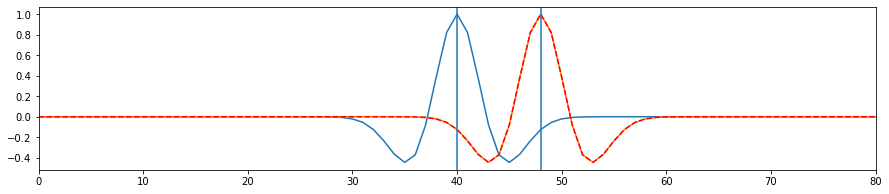

In [16]:
FFTop = FFT(nt, sampling=dt, real=True)
Sop = Diagonal(np.exp(-1j*2*np.pi*FFTop.f*itshift*dt), dtype=np.complex)
Op = FFTop.H * Sop * FFTop
wavshift1 = Op * wav

plt.figure(figsize=(15, 3))
plt.plot(wav)
plt.plot(wavshift)
plt.plot(wavshift1, '--r')
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80)

(0.0, 80.0)

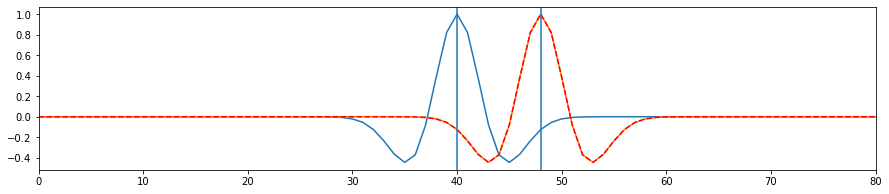

In [17]:
Op = Shift(nt, dt*itshift, sampling=dt, real=True, dtype=np.float64)
wavshift1 = Op * wav

plt.figure(figsize=(15, 3))
plt.plot(wav)
plt.plot(wavshift)
plt.plot(wavshift1, '--r')
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80)

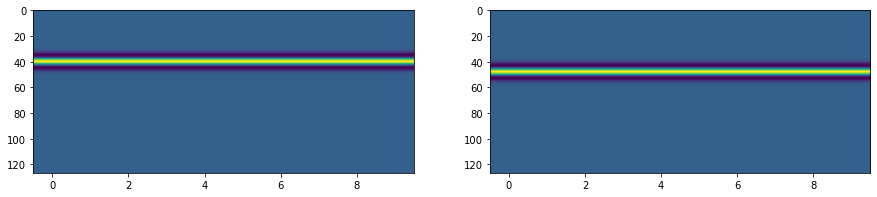

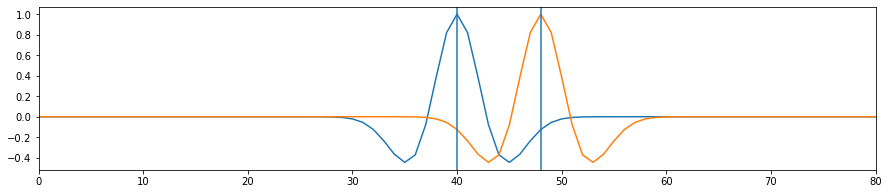

In [18]:
wav2d = np.outer(wav, np.ones(10))

Op = Shift((nt, 10), dt*itshift, dir=0, sampling=dt, real=True, dtype=np.float64)
wav2dshift = (Op * wav2d.ravel()).reshape(nt, 10)

fig, axs = plt.subplots(1, 2, figsize=(15, 3))
axs[0].imshow(wav2d)
axs[0].axis('tight')
axs[1].imshow(wav2dshift)
axs[1].axis('tight')

plt.figure(figsize=(15, 3))
plt.plot(wav2d[:, 5])
plt.plot(wav2dshift[:, 5])
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80);

Dot test passed, v^T(Opu)=-15.371286 - u^T(Op^Tv)=-15.371286


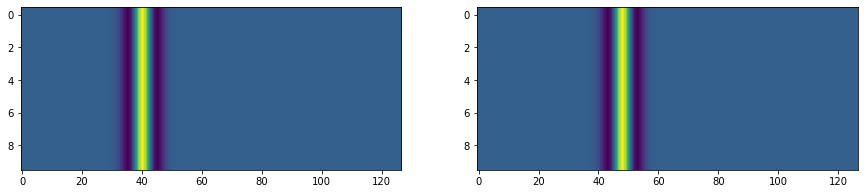

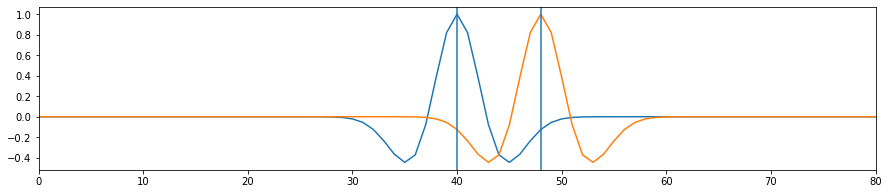

In [19]:
wav2d = np.outer(wav, np.ones(10)).T

Op = Shift((10, nt), dt*itshift, dir=1, sampling=dt, real=True, dtype=np.float64)
wav2dshift = (Op * wav2d.ravel()).reshape(10, nt)
dottest(Op, complexflag=0, verb=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 3))
axs[0].imshow(wav2d)
axs[0].axis('tight')
axs[1].imshow(wav2dshift)
axs[1].axis('tight')

plt.figure(figsize=(15, 3))
plt.plot(wav2d[5])
plt.plot(wav2dshift[5])
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80);